In [1]:
import matplotlib.pyplot as plt

In [2]:
from simulation import run_annotation_simulation_lemma

In [3]:
split = 'test'
dataset = 'ecb'

In [4]:
ecb_results = run_annotation_simulation_lemma('ecb', split, ns=[i/2 for i in range(2,40)])

Total mention pairs in the Test set: 93878


Generating Similarities: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 93878/93878 [00:00<00:00, 261482.13it/s]


In [5]:
gvc_results = run_annotation_simulation_lemma('gvc', split)

Total mention pairs in the Test set: 18961


Generating Similarities: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18961/18961 [00:00<00:00, 230502.49it/s]


In [7]:
_, ecb_comparisons, ecb_recall, _ = zip(*ecb_results)
_, gvc_comparisons, gvc_recall, _ = zip(*gvc_results)

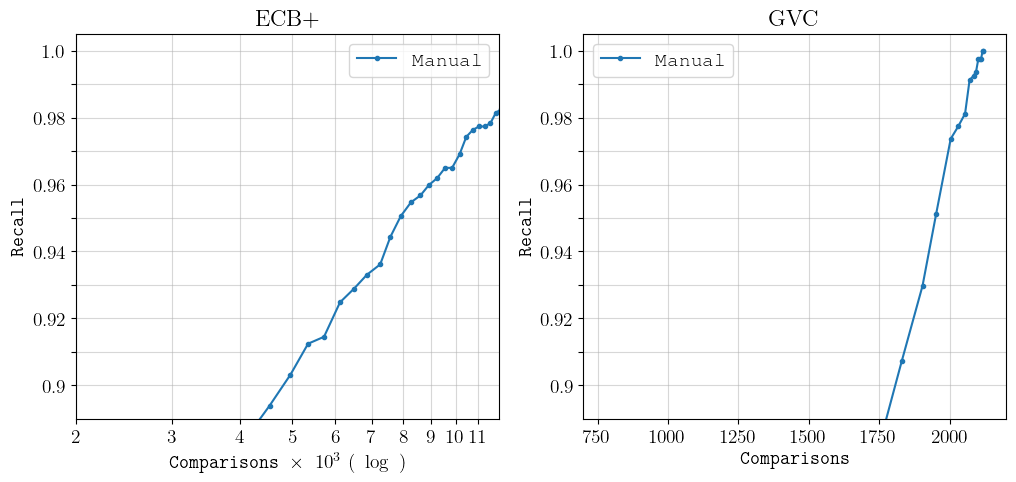

In [18]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14
plt.rcParams["font.family"] = "Times New Roman"
fig, axes = plt.subplots(1,2)
# ax.plot(comparisons_cdlm_t[3:-7], recalls_cdlm_t[3:-7], '-.o', markersize=3, label='CDLM-T')
# ax.plot(comparisons_cdlm_nt[3:-7], recalls_cdlm_nt[3:-7], '-.o', markersize=3, label='CDLM')

courier= {'fontname':'Courier New'}
# courier= {'fontname':'Courier'}
csfont = {'fontname':'Times New Roman'}


def plot_ecb(ax):
    ax.set_title('ECB+')
    ax.plot(ecb_comparisons, ecb_recall, '-o', markersize=3, label=r'{\fontfamily{qcr}\selectfont Manual}')
    ax.set_yticks([(90+i)/100 for i in range(11)])
    ax.set_yticklabels([str((90+i)/100) if i%2==0 else None for i in range(11)])
    ax.set_ylabel(r'$\mathtt{Recall}$', **courier)
    ax.set_ylim(0.89, 1.005)
    
    ax.set_xscale('log')
    ax.set_xticks([i*1000 for i in range(2,12)])
    ax.set_xlim(2000, 12000)
    ax.set_xticklabels([str(i) for i in range(2,12)])
    ax.set_xlabel(r'$\mathtt{Comparisons}~\times~10^3~(~\log~)$')
    
    ax.grid(alpha=0.5)
    ax.legend()
    

def plot_gvc(ax):
    ax.set_title('GVC')
    ax.plot(gvc_comparisons, gvc_recall, '-o', markersize=3, label=r'{\fontfamily{qcr}\selectfont Manual}')
    
    ax.set_xlabel(r'$\mathtt{Comparisons}$')
    ax.set_xlim(700, 2200)
    
    ax.set_ylabel(r'$\mathtt{Recall}$')
    ax.set_ylim(0.89, 1.005)
    ax.set_yticks([(90+i)/100 for i in range(11)])
    ax.set_yticklabels([str((90+i)/100) if i%2==0 else None for i in range(11)])
    
    ax.grid(alpha=0.5)
    ax.legend()
    
plot_ecb(axes[0])
plot_gvc(axes[1])
# plt.grid()
# plt.legend(prop={'family':'Courier New'})